In [ ]:
!rm /workspace/stable-diffusion-webui/models/Stable-diffusion/*
!wget -O /workspace/stable-diffusion-webui/models/Stable-diffusion/anything-v4.5-pruned.safetensors /
    https://huggingface.co/andite/anything-v4.0/resolve/main/anything-v4.5-pruned.safetensors
!gdown -O /workspace/stable-diffusion-webui/models/Lora/Lucario.safetensors /
    https://drive.google.com/uc?id=1BrwBns8ktDh2J24XZmPppJwitigbZJ_N

In [ ]:
!wget -O /workspace/stable-diffusion-webui/models/Stable-diffusion/Kemono.safetensors /
    https://civitai.com/api/download/models/27823 --content-disposition

In [1]:
from base64 import b64decode
from io import BytesIO
from PIL import Image

ModuleNotFoundError: No module named 'PIL'

In [ ]:
strb.decode("utf-8")

In [ ]:
rawbytes = BytesIO(b64decode(strb))
new = Image.frombytes("RGBA", (240, 60), rawbytes.getvalue())

## API Test

In [1]:
import requests
import json
from IPython import display
from base64 import b64decode

In [2]:
url = "https://api.runpod.ai/v2/69xjmjth10zw7e/run"
headers = {
    "Content-Type": "application/json; charset=utf-8",
    "Authorization": f"Bearer RR78EF2ITGBARFJOTEFXS79NIV0K2E36FZYVI56N",
}
input_ = json.loads(prompt_text)
input_["img_url"] = "https://pbs.twimg.com/media/F8KrMZ8bcAAegJu.jpg"
body = {"input": input_}

res1 = requests.post(url, headers=headers, json=body)
print(res1.status_code)
res1.json()

NameError: name 'prompt_text' is not defined

In [ ]:
id_ = "39c16872-8b7c-45ee-b76f-b84e35608ffe-e1" or res1.json()["id"]
res = requests.get(
    "https://api.runpod.ai/v2/69xjmjth10zw7e/status/" + id_,
    headers=headers,
)
res.json()

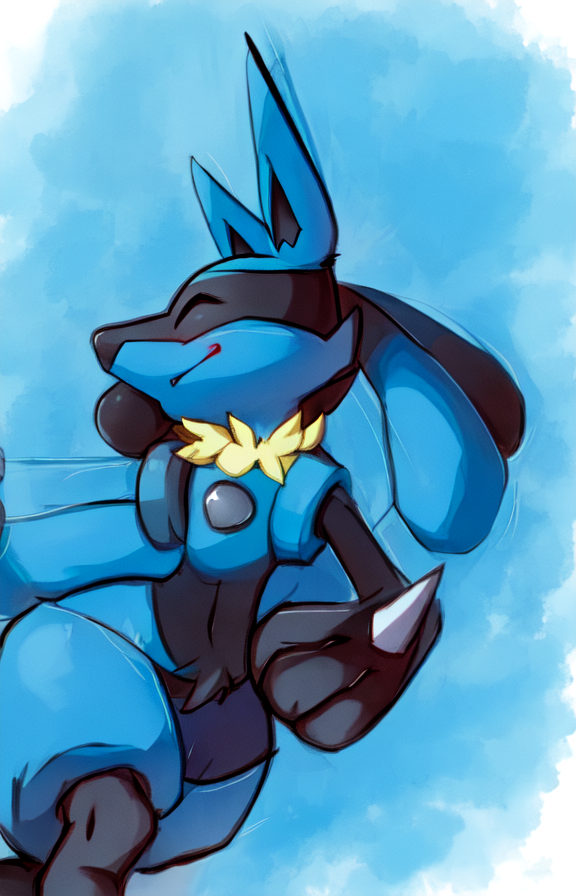

In [57]:
# for i, img in enumerate(res.json()["output"]["outputs"]):
#     display.Image(b64decode(img[2:]))
display.Image(b64decode(res.json()["output"]["outputs"][0][2:]))
display.Image(b64decode(res.json()["output"]["outputs"][1][2:]))

## CivitAI

In [2]:
res = requests.get(
    "https://civitai.com/api/v1/model-versions/by-hash/02591F022CE0B3C1C76BB3BC72AF4E662CFBA29792C266597C6964E593635438"
)
res.json()

{'id': 156883,
 'modelId': 3671,
 'name': 'v34',
 'createdAt': '2023-09-07T09:27:51.586Z',
 'updatedAt': '2023-10-19T01:43:40.175Z',
 'trainedWords': [],
 'trainingStatus': None,
 'trainingDetails': None,
 'baseModel': 'SD 1.5',
 'baseModelType': 'Standard',
 'earlyAccessTimeFrame': 0,
 'description': '<p>Recipes v34:</p><p>preYM3 = (Fluffusion-e20+Zeipher F111-SD4) * diff:1.0<em> + </em>Furraffinity-e21<em> </em>* 0.35 + Furtastic v2 * 0.35</p><p>partA = ((preYM3 + ReV Animated v1.2.2 * 0.5) + Newdawn v52 - SD5) * trainDiff:0.35</p><p>partB = ((partA + FluffyRock-e99-snr-e72 * 0.45) + IndigoFurryMix v35 Realistic - YiffyMix v22) * trainDiff:0.35</p><p>YiffyMix v34 = partB + LoRA:Detail Tweaker * 0.2 + LoRA:FluffyRock-Quality-Tags (v20 * 0.70 + v30 * 0.85)  * 0.5</p>',
 'stats': {'downloadCount': 12591, 'ratingCount': 122, 'rating': 4.9},
 'model': {'name': 'YiffyMix',
  'type': 'Checkpoint',
  'nsfw': True,
  'poi': False},
 'files': [{'id': 117624,
   'sizeKB': 2323304.733398438,
   

### Comfy UI

In [ ]:
import requests

In [8]:
with open(
    "C:/Users/hoang/OneDrive/Documents/KO GIAN LÀM VIỆC/JupyterNotebooks/code/direct-requests/workflow_api.json",
    "r",
) as f:
    prompt_text = f.read()
print(prompt_text.replace('"<INT SEED>"', "123"))

{
  "1": {
    "inputs": {
      "seed": 857098385054784,
      "steps": 20,
      "cfg": 7,
      "sampler_name": "euler_ancestral",
      "scheduler": "normal",
      "denoise": 1,
      "model": [
        "30",
        0
      ],
      "positive": [
        "10",
        0
      ],
      "negative": [
        "10",
        1
      ],
      "latent_image": [
        "35",
        0
      ]
    },
    "class_type": "KSampler"
  },
  "2": {
    "inputs": {
      "ckpt_name": "yiffymix_v34.safetensors"
    },
    "class_type": "CheckpointLoaderSimple"
  },
  "5": {
    "inputs": {
      "text": "low quality, cum, bad anatomy, deformity",
      "clip": [
        "30",
        1
      ]
    },
    "class_type": "CLIPTextEncode"
  },
  "6": {
    "inputs": {
      "samples": [
        "1",
        0
      ],
      "vae": [
        "2",
        2
      ]
    },
    "class_type": "VAEDecode"
  },
  "7": {
    "inputs": {
      "image": "F8KrMZ8bcAAegJu.jpg",
      "choose file to upload": "i

In [189]:
import json
from urllib import request, parse


def queue_prompt():
    p = {"prompt": json.loads(prompt_text)}
    req = requests.post("http://127.0.0.1:8188/prompt", json=p)
    return req


res = queue_prompt()

In [198]:
res.text
prompt_id = res.json()["prompt_id"]
res2 = requests.get(f"http://127.0.0.1:8188/history/{prompt_id}")
print(res2)
res2.json()[prompt_id]["outputs"]["8"]["images"]

<Response [200]>


[{'filename': 'comfyui-clora-canny_00033_.png',
  'subfolder': '',
  'type': 'output'},
 {'filename': 'comfyui-clora-canny_00034_.png',
  'subfolder': '',
  'type': 'output'},
 {'filename': 'comfyui-clora-canny_00035_.png',
  'subfolder': '',
  'type': 'output'},
 {'filename': 'comfyui-clora-canny_00036_.png',
  'subfolder': '',
  'type': 'output'},
 {'filename': 'comfyui-clora-canny_00037_.png',
  'subfolder': '',
  'type': 'output'}]

In [199]:
for img in res2.json()[prompt_id]["outputs"]["8"]["images"]:
    print(img["filename"])

comfyui-clora-canny_00033_.png
comfyui-clora-canny_00034_.png
comfyui-clora-canny_00035_.png
comfyui-clora-canny_00036_.png
comfyui-clora-canny_00037_.png
